# Linear Regression modeling 



In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/regression/car-reg-data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9055 entries, 0 to 9054
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   make           8164 non-null   object 
 1   transmission   8106 non-null   object 
 2   state          8152 non-null   object 
 3   condition      8173 non-null   float64
 4   odometer       8178 non-null   float64
 5   auction_value  8107 non-null   float64
 6   selling_price  9055 non-null   float64
dtypes: float64(4), object(3)
memory usage: 495.3+ KB


In [3]:
from sklearn.model_selection import train_test_split
features = [x for x in df.columns if x != 'selling_price']

X = df[features]
y = df['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

print(f'Records in training data: {X_train.shape[0]:,}')
print(f'Records in test data: {X_test.shape[0]:,}')
print('\nFeatures:')
print(*X_train.columns, sep='\n')

Records in training data: 7,244
Records in test data: 1,811

Features:
make
transmission
state
condition
odometer
auction_value


## Spliting the features into two lists, one for the numerical features and another for the categorical features.

In [8]:
# insert code here
num_list = ['condition', 'odometer', 'auction_value'] #list of numerical features
cat_list = ['make','transmission','state'] #list of categorical features

## Using the numerical variables, we create a pipeline that replaces the missing values with the median and then standardizes the values using a standard scaler.

In [5]:
# insert code here
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


num_pipeline = Pipeline([('impute_missing', SimpleImputer(strategy='median')),
                           ('standardize_num', StandardScaler())])
print(num_pipeline) #numerical pipeline for replacing missing values with median and standardizing values with Standard Scaler

Pipeline(steps=[('impute_missing', SimpleImputer(strategy='median')),
                ('standardize_num', StandardScaler())])


## Using the categorical variables, we create a pipeline that replaces the missing values with the most frequent and then use one-hot encoding to convert the data to numerical arrays.
- We should be dropping one category from each variable when using the one-hot encoder.  
- To ensure the pipeline doesn't break when it receives new/unexpected categories, we should ignore new categories.
- Use a fit transformer on the training dataset to validate all the columns are now numeric and to determine how many columns the transformed data contains.

In [6]:
cat_pipeline = Pipeline([('impute_missing_cats', SimpleImputer(strategy='most_frequent')),
                          ('create_dummies_cats', OneHotEncoder(handle_unknown='ignore', drop='first'))])
print(cat_pipeline) # categorical pipeline to replace missing values with most frequent values and used one hot encoder.

Pipeline(steps=[('impute_missing_cats',
                 SimpleImputer(strategy='most_frequent')),
                ('create_dummies_cats',
                 OneHotEncoder(drop='first', handle_unknown='ignore'))])


## Combine the numerical and categorical pipelines into one data processing pipeline.
- Use a fit transformers and the training dataset to verify the data has no missing values and the correct number of columns.

In [9]:
processing_pipeline = ColumnTransformer(transformers=[('proc_numeric', num_pipeline, num_list),('create_dummies', cat_pipeline, cat_list)])
print(processing_pipeline)
# X_train = processing_pipeline.fit_transform(X_train)

ColumnTransformer(transformers=[('proc_numeric',
                                 Pipeline(steps=[('impute_missing',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize_num',
                                                  StandardScaler())]),
                                 ['condition', 'odometer', 'auction_value']),
                                ('create_dummies',
                                 Pipeline(steps=[('impute_missing_cats',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('create_dummies_cats',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['make', 'transmission', 'state'])])


## Adding a linear regression model to the pipeline.

In [10]:
from sklearn.linear_model import LinearRegression

modeling_pipeline = Pipeline([('data_processing', processing_pipeline), 
                              ('lm', LinearRegression())])
modeling_pipeline.fit(X_train, y_train)

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['condition', 'odometer',
                                                   'auction_value']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('impute_missing_cats',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('create_dummies_cats',
                                  

In [11]:
y_pred = modeling_pipeline.predict(X_test)

In [12]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('R2 of the predicted data is', r2)

R2 of the predicted data is 0.8838274405991853


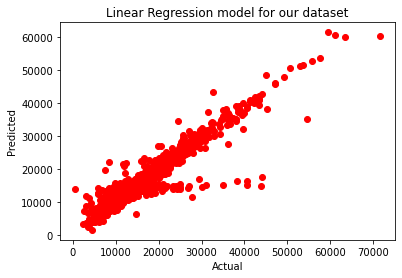

In [13]:
import matplotlib.pyplot as plt
plt.plot(y_test, y_pred, 'ro')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression model for our dataset')
plt.show()

## Creating a plot of the residuals.

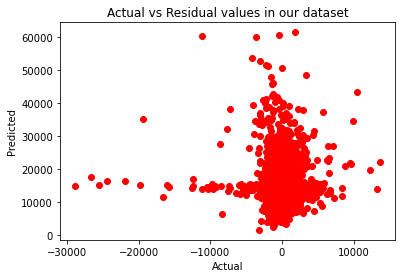

In [14]:
resid = y_pred - y_test
plt.plot(resid, y_pred, 'ro')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Residual values in our dataset')
plt.show()

- We can see that most residual values are centered around 0, which means that there is very less leakage of data
- Very few outliers in the residual data, but no significangt pattern seen that could indicate any feature that was lost in predictions 

## Modifying the pipeline to use a ridge regression model with an alpha value.

In [27]:
from sklearn.linear_model import Ridge

modeling_pipeline_ridge = Pipeline([('data_processing', processing_pipeline), ('ridge', Ridge(alpha=5))])
modeling_pipeline_ridge.fit(X_train, y_train)

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['condition', 'odometer',
                                                   'auction_value']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('impute_missing_cats',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('create_dummies_cats',
                                  

In [28]:
yridge_pred = modeling_pipeline_ridge.predict(X_test)

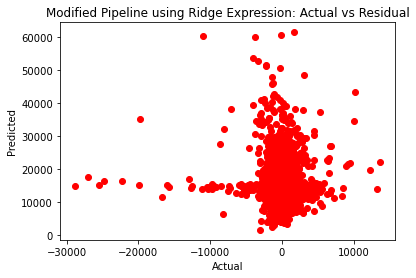

In [29]:
resid = yridge_pred - y_test
plt.plot(resid, y_pred, 'ro')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Modified Pipeline using Ridge Expression: Actual vs Residual')
plt.show()

In [30]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, yridge_pred)
print('R2 the predicted data with ridge expression is', r2)

R2 the predicted data with ridge expression is 0.8837152420120518


- No significant change in the R2 value, it has decreased minutely.